In [46]:
%matplotlib inline

# Světelná křivka

* http://keplerscience.arc.nasa.gov/DataAnalysisInspectionLC.shtml
* http://en.wikipedia.org/wiki/RR_Lyrae

* Stánout světlnou křivku RR Lyr pořízenou Keplerem
* Vykreslit ji.
* Spočítat periodogram.
* Vykreslit fázovou světelnou křivku hlavní periodou

In [76]:
DATA = "../data/Kepler/RRLyr/"

In [325]:
import os
import glob
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt

In [326]:
light_curves = glob.glob(os.path.join(DATA, "*_slc.fits.gz"))
lc = light_curves[0]

In [327]:
fits.info(lc)

Filename: ../data/Kepler/RRLyr/kplr100002731-2012277125453_slc.fits.gz
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      56   ()              
1    LIGHTCURVE  BinTableHDU    155   50160R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
2    APERTURE    ImageHDU        48   (11, 69)     int32   


In [328]:
data = fits.getdata(lc, "LIGHTCURVE")

In [329]:
BJDREFI = fits.getval(lc, "BJDREFI", "LIGHTCURVE")
BJDREFF = fits.getval(lc, "BJDREFF", "LIGHTCURVE")

In [330]:
BJD = data["TIME"] + BJDREFI + BJDREFF
LC = data["PDCSAP_FLUX"].astype("float64")

In [332]:
for lc in light_curves:
    data = fits.getdata(lc, "LIGHTCURVE")
    BJDREFI = fits.getval(lc, "BJDREFI", "LIGHTCURVE")
    BJDREFF = fits.getval(lc, "BJDREFF", "LIGHTCURVE")
    np.append(BJD, data["TIME"] + BJDREFI + BJDREFF)
    np.append(LC, data["PDCSAP_FLUX"].astype("float64"))

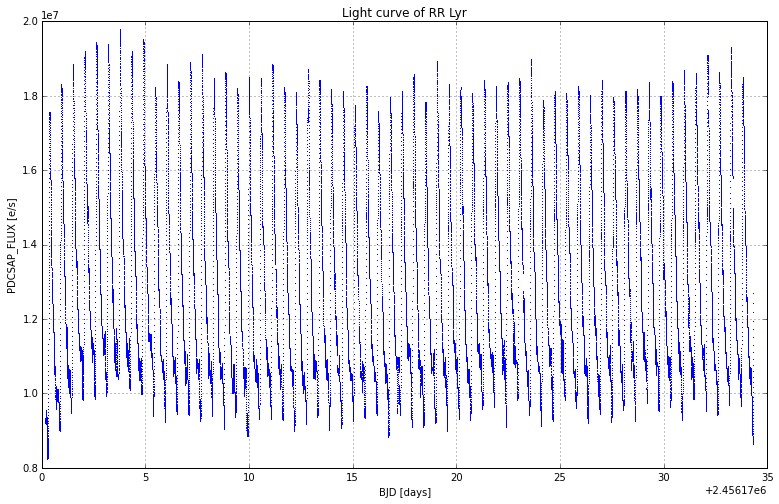

In [356]:
plt.figure(figsize=(13,8))
plt.title("Light curve of RR Lyr")
plt.xlabel("BJD [days]")
plt.ylabel("PDCSAP_FLUX [e/s]")
plt.plot(BJD, LC, ",")
plt.grid(True)

In [357]:
maska = np.isnan(LC) == False

In [358]:
import sys
sys.path.append(os.path.abspath('../externals/periodogram/'))
from periodogram.lomb_scargle import LombScargle

In [359]:
model = LombScargle(pmin=0.2, pmax=0.8, resolution=1e4)
model.fit(BJD[maska], LC[maska])

In [360]:
periods = np.linspace(0.2, 0.8, 1e3)
scores = model.score(periods)

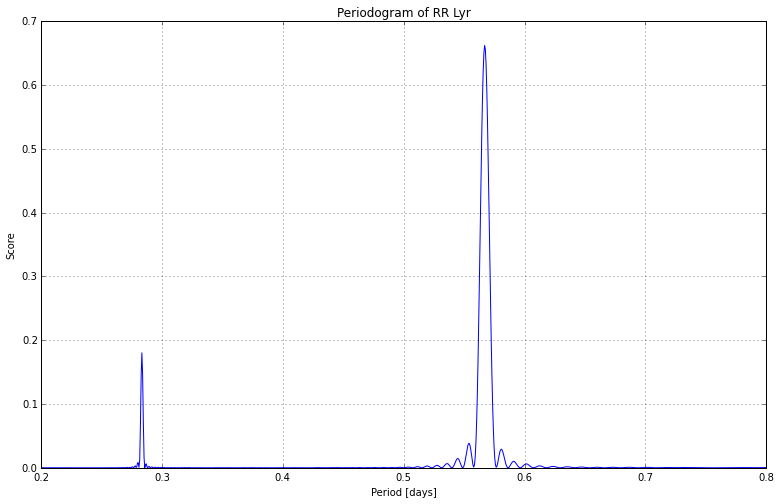

In [361]:
plt.figure(figsize=(13,8))
plt.title("Periodogram of RR Lyr")
plt.xlabel("Period [days]")
plt.ylabel("Score")
plt.plot(periods, scores)
plt.grid(True)

In [362]:
periods = np.linspace(0.5, 0.6, 1e3)
scores = model.score(periods)
best_period = periods[np.argmax(scores)]
print(best_period)

0.567067067067


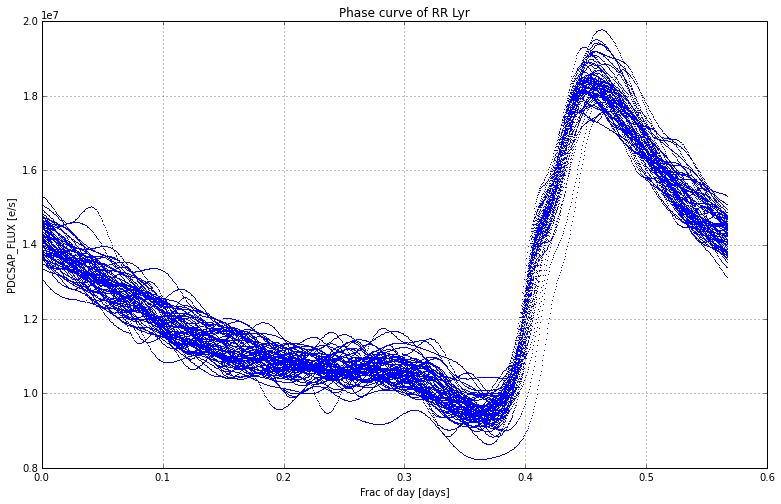

In [364]:
tfit = np.linspace(0, best_period, 1000)
plt.figure(figsize=(13,8))
plt.title("Phase curve of RR Lyr")
plt.xlabel("Frac of day [days]")
plt.ylabel("PDCSAP_FLUX [e/s]")
plt.plot(BJD % best_period, LC, ",")
plt.grid(True)